## 16-Decrease the amplitude in the first 5 swings

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


In [38]:
def ode_func(x, t, Xi, omega_n): 
    # x = [displacement, velocity]
    # x[0] = displacement
    # x[1] = velocity
    
    # dxdt = [d(displacement)/dt, d(velocity)dt]
    # dxdt = [v, d(v)dt]
    

    dxdt = [x[1], -2 * Xi * omega_n * x[1] - omega_n ** 2 * x[0]]
    return dxdt

In [39]:
# Parameter values
m = 1
k = 10
Xi = 0.02

# Calculate the natural frequency of the system
omega_n = np.sqrt(k/m)

# Initial conditions 1
x01 = [1.0, 10.0]  # Initial displacement and velocity

# Time
t = np.linspace(0, 20, 200)


In [40]:
# Solve the system of differential equations using odeint
solution1 = odeint(ode_func, x01, t, args=(Xi, omega_n))

# Find local max
def find_local_max(data):  # item - 1 , item, item + 1
    maximum = []
    for i in range(1, len(data) - 1):
        if data[i] > data[i-1] and data[i] > data[i+1]:
            maximum.append(data[i])
    return maximum

maximum = find_local_max(solution1[:, 0])
print(maximum[:10])


[3.252514535170795, 2.8558876614351005, 2.5021013713243105, 2.2247761208033268, 1.9678879225596508, 1.7316778909509298, 1.5159441232663766, 1.34190070884397, 1.189554245572073, 1.0490477767785482]


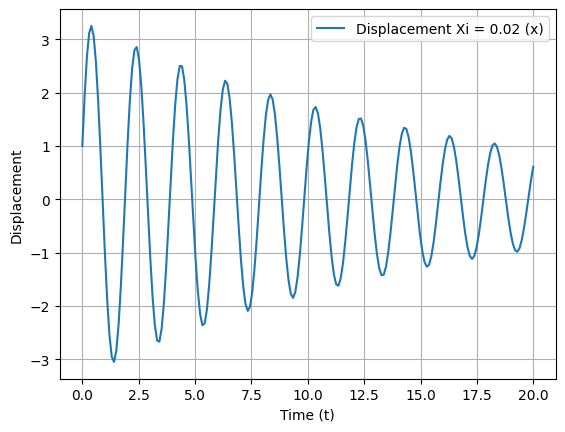

In [41]:
# Display the solution
plt.plot(t, solution1[:, 0], label='Displacement Xi = 0.02 (x)')
plt.xlabel('Time (t)')
plt.ylabel('Displacement')
plt.legend()
plt.grid(True)
plt.show()